In [129]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("../linear-regression/CURSO_IA_ML/Aula 2/housing.csv")
dataset.head()
# dataset.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

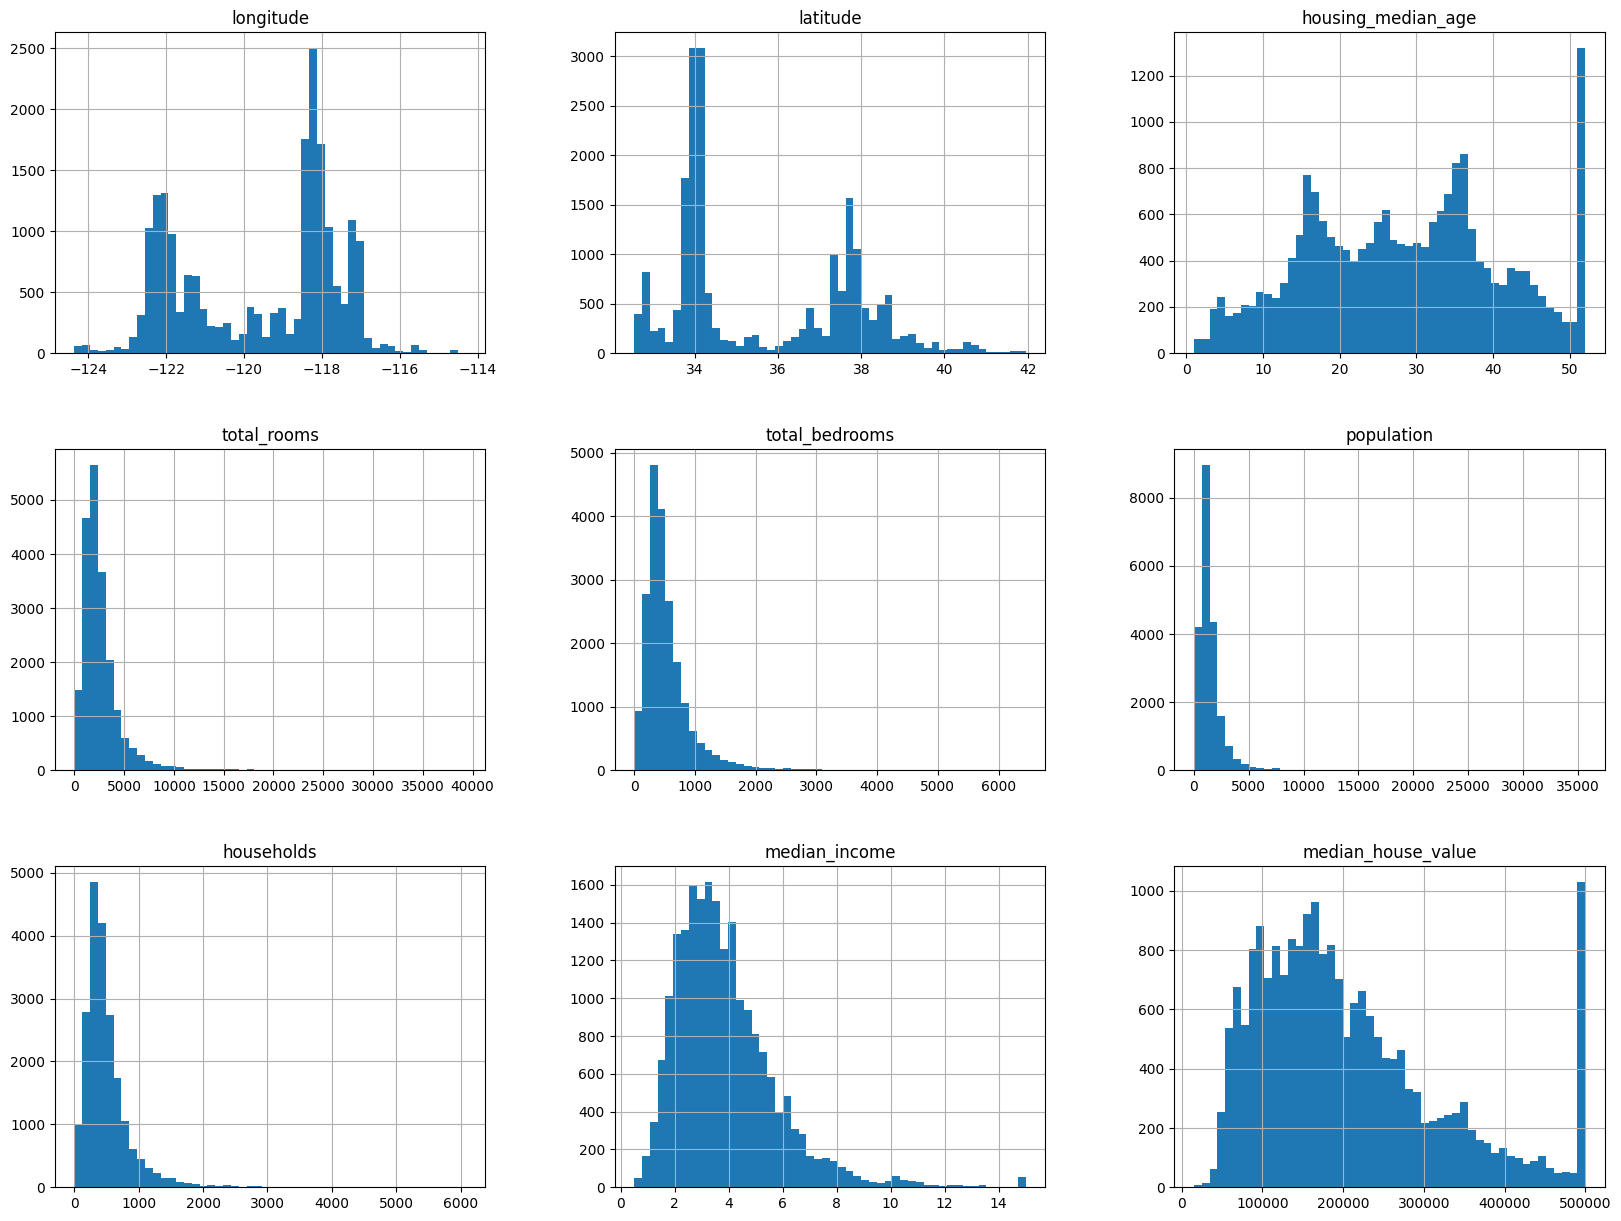

In [3]:
dataset.hist(bins=50, figsize=(20,15))

# Começando o Modelo

## Antes de começar. Como definir nossa variável TARGET?

Qual nosso objetivo? Descobrir quanto uma casa custará, ou seja, nosso target é "median_house_value"

Para classificar as linhas com base na target poderiamos usar:
- K-means
- Sturges
- IQR

Neste caso mais simples vamos usar STURGES que acaba criando 16 classes por conta do "median_income".

Há um exemplo também com IQR, mas gera muitas classes por causa da dispersão dos dados.

Haverá um exemplo de K-means em outro arquivo somente para ele. Que realmente seria o ideal!

<Axes: >

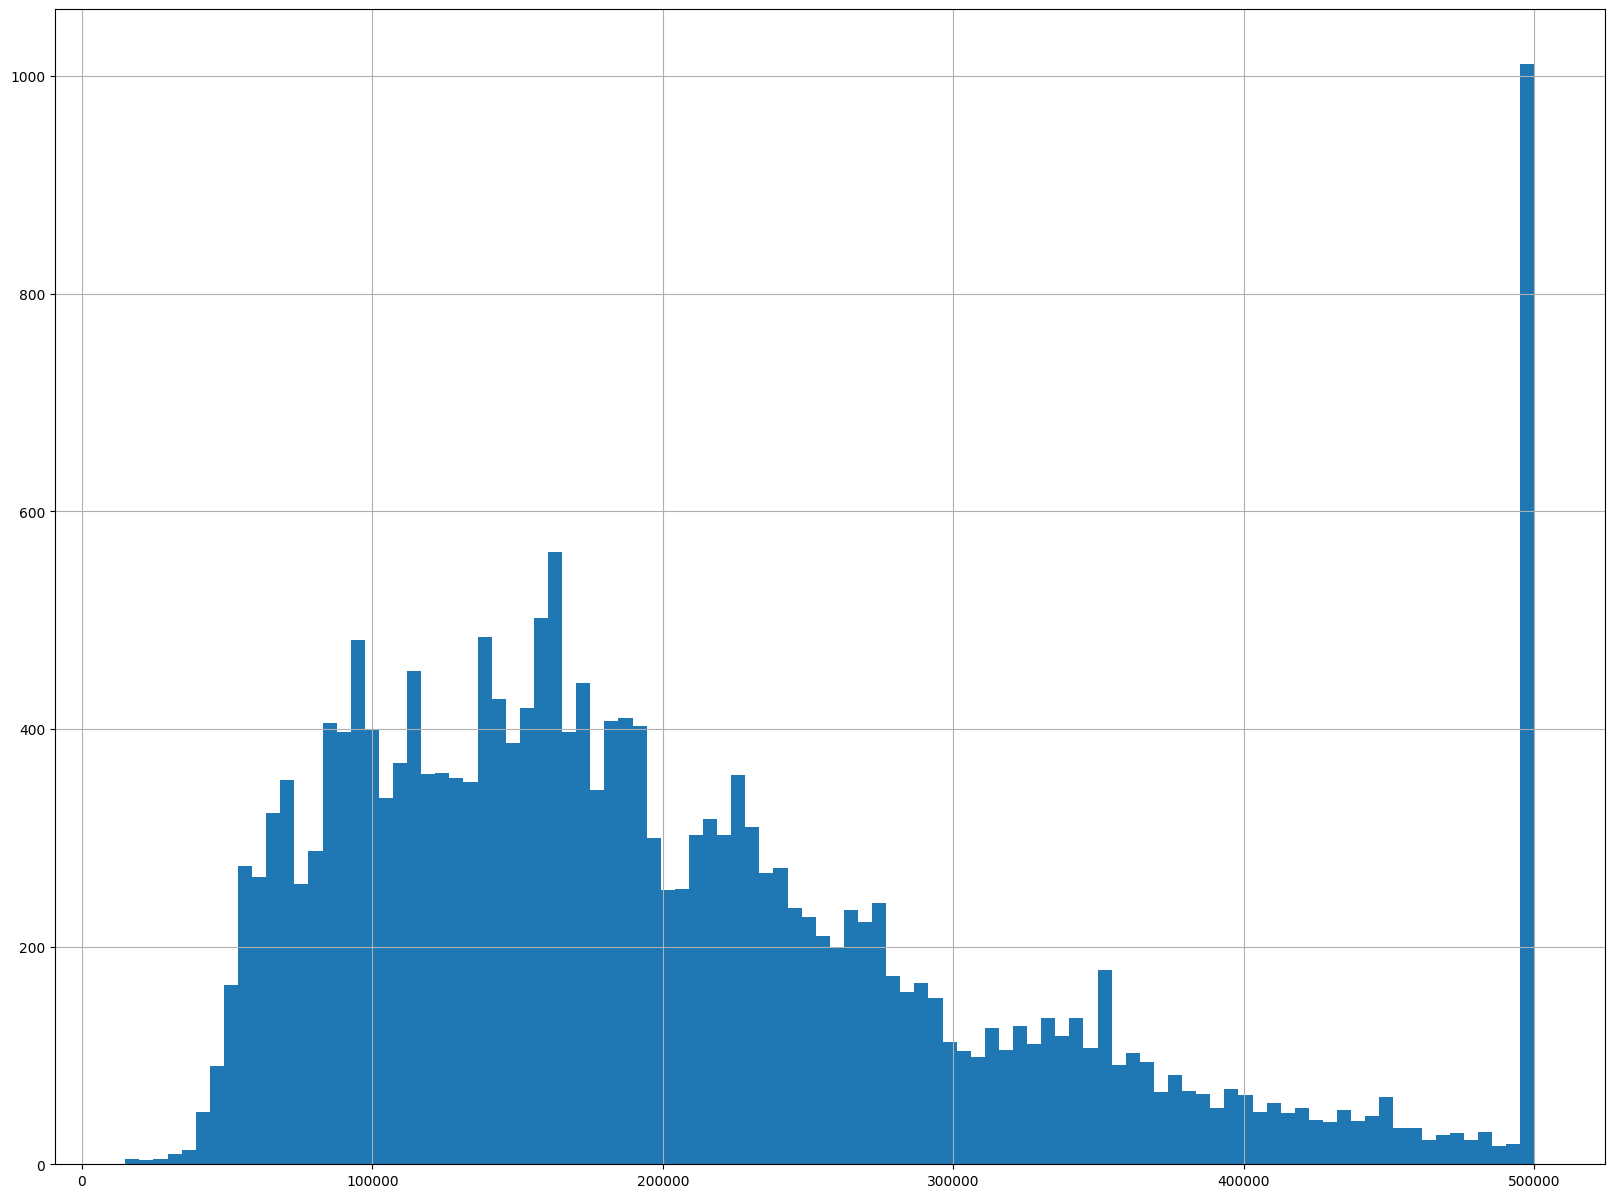

In [4]:
target = "median_house_value"
dataset[target].hist(bins=100, figsize=(20,15))

Para definir a quantidade de classes

In [5]:
# Sturges - Criando BINS (classes)
import numpy as np
n = len(dataset[target])
bins = int(np.ceil(np.log2(n) + 1))
method = 'STURGES'

In [4]:
# Freedman–Diaconis Rule (IQR)- Criando BINS (classes)
# from scipy.stats import iqr
# import numpy as np
# data = dataset["median_house_value"]
#
# bin_width = 2 * iqr(data) / len(data)**(1/3)
# bins = int(np.ceil((data.max() - data.min()) / bin_width))
# method = 'IQR'

Número ideal de classes (Sturges) para median_house_value é 46


In [6]:
print(f"Número ideal de classes {method} para {target} é {bins}")

Número ideal de classes STURGES para median_house_value é 16


In [7]:
# Criando os bins (classes)
# Labels personalizados iniciando em 1

labels = list(range(1, bins + 1))  # Ex: [1, 2, 3, ..., k]
dataset['target_class'] = pd.cut(dataset[target], bins=bins, labels=labels)

<Axes: >

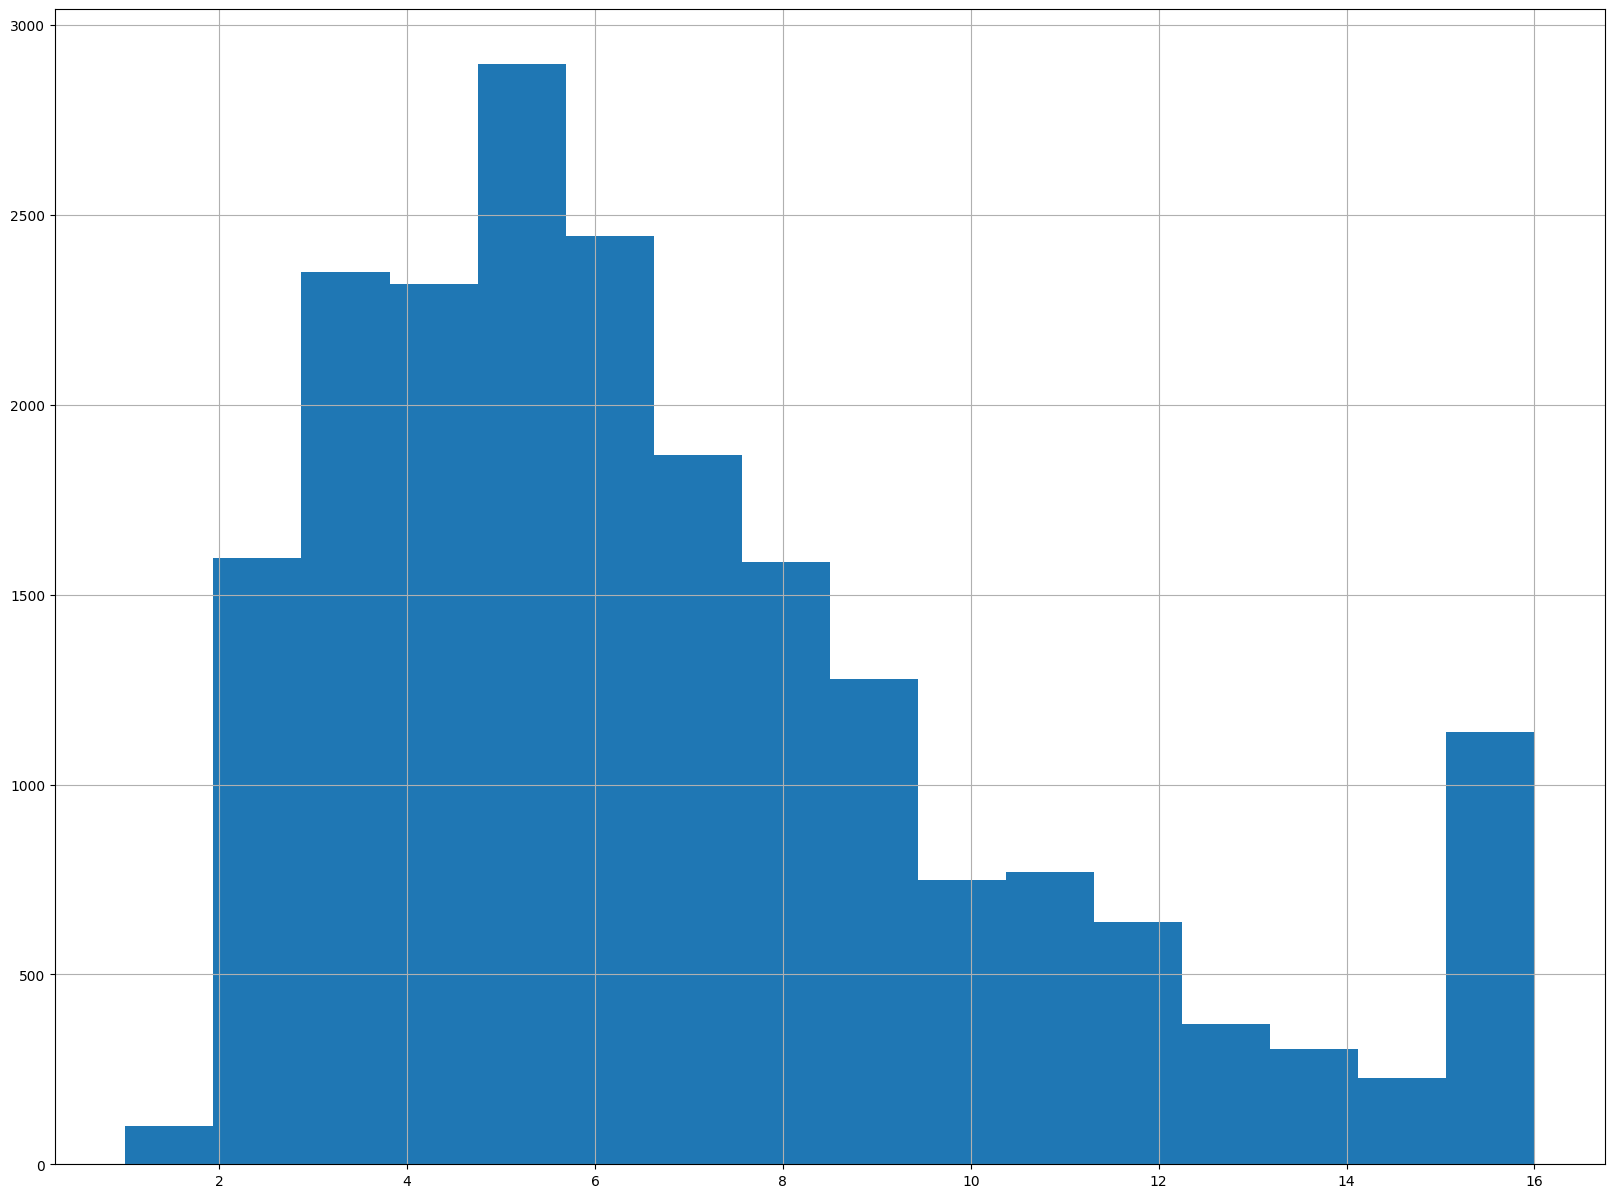

In [8]:
dataset["target_class"].hist(bins=bins, figsize=(20,15))

🧪 2. Divisão da base de dados
Usar quando: vai separar em treino/teste, mantendo proporções das classes.

Ou seja, se temos 5 classes (target_class) no dataset, o percentual deve se manter o mesmo na base real, treino e teste. se tem 35% na classe 2 na base real. é preciso ter os mesmos 35% na base de teste e treino também

- train_test_split → separação aleatória simples
- **StratifiedShuffleSplit** → separação estratificada (mantém a proporção das classes)
- KFold, StratifiedKFold → para validação cruzada

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_train_set: pd.DataFrame = pd.DataFrame()
strat_test_set: pd.DataFrame = pd.DataFrame()

splitter = StratifiedShuffleSplit(
    # qtde de splits - treino e teste pode ser apenas 1, mas podemos fazer mais splits
    n_splits=1,
    test_size=0.2,
    random_state=42 # seed
)

split_data = splitter.split(
    dataset,
    dataset["target_class"], # TARGET!
)

for train_index, test_index in split_data:
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [10]:
strat_train_set.head()
# strat_train_set.info()
# if not strat_test_set.empty:
# strat_train_set['target_class'].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,target_class
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,<1H OCEAN,6
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,INLAND,5
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,INLAND,11
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,INLAND,5
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,<1H OCEAN,6


# Visualizando os Dados!


EOK! Este é o estado da Caifornia 🏖 Vamos visualizar as concentrações de pontos?

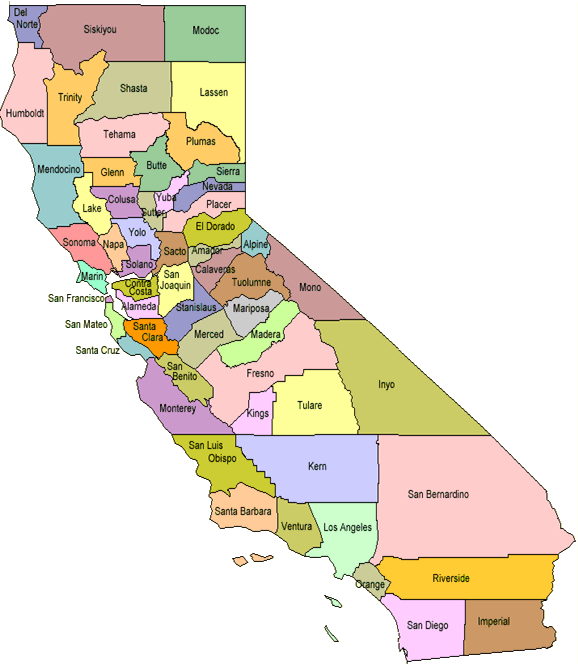

<Axes: xlabel='longitude', ylabel='latitude'>

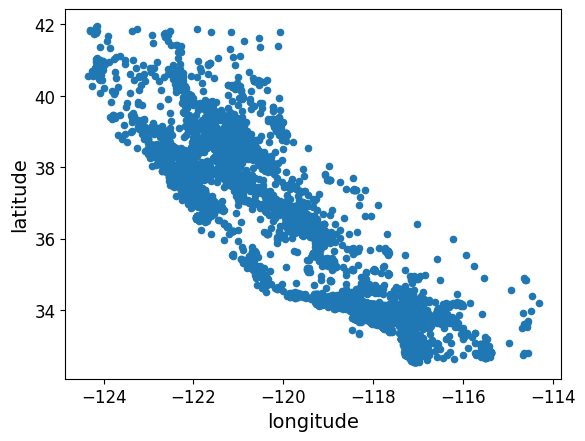

In [41]:
strat_train_set.plot(kind="scatter", x="longitude", y="latitude")

Com alpha=0.1, os pontos individuais são mais claros, mas onde muitos pontos se sobrepõem, a cor se intensifica. Isso permite que você visualize facilmente as regiões de alta densidade

<Axes: xlabel='longitude', ylabel='latitude'>

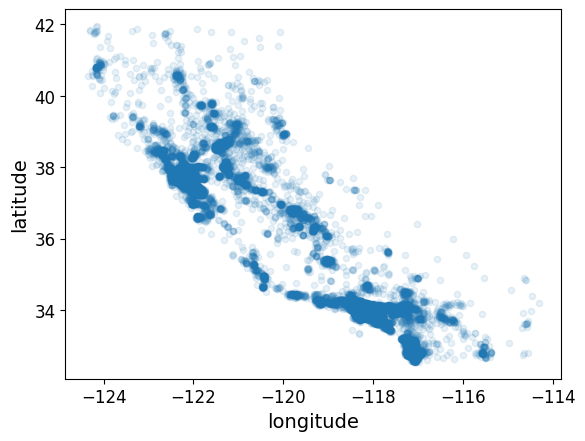

In [42]:

strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## Agora, vendo por preço!

In [119]:
selected_dataset = strat_train_set

<Axes: xlabel='longitude', ylabel='latitude'>

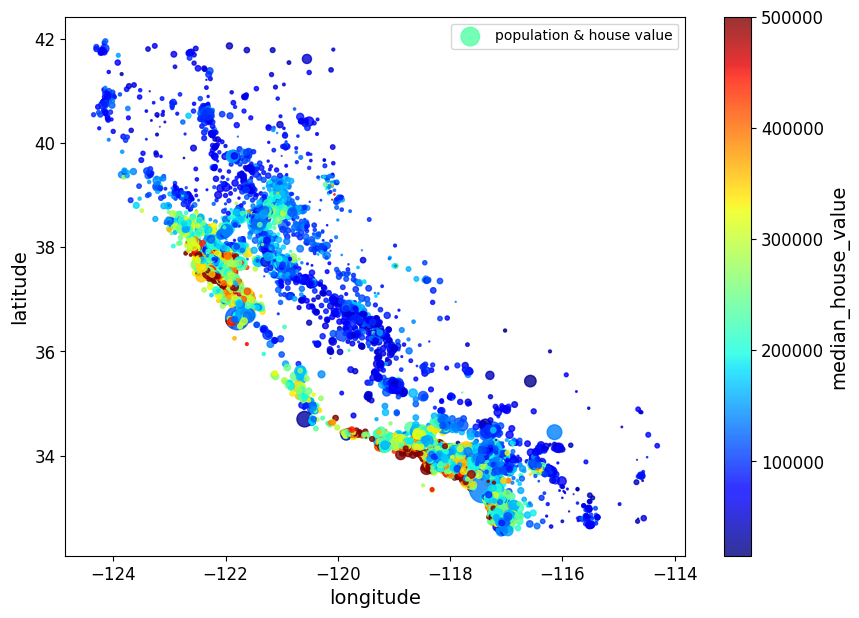

In [92]:
selected_dataset.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    # s = size | tamanho dos pontos conforme a população | dividir por 100 para reduzir a escala
    s=selected_dataset["population"]/100,
    # c = color - Os pontos serão coloridos de acordo com o valor dessa coluna
    c="median_house_value",
    colorbar=True, # indica que deve exibir a barra de cores na lateral
    cmap=plt.get_cmap("jet"), # define qual esquema de cores deve ser usado por C
    alpha=0.8,
    label="population & house value",
    figsize=(10,7), # tamanho do gráfica em polegadas
)

# Regressão Linear Múltipla - Buscando correlações 🔎

Primeiro, correlation só funciona com dados numéricos. Então precisamos converter colunas categóricas para colunas numéricas

## 🔧  Converter os dados MANUALMENTE (apenas pandas)

- Extrair as colunas categoricas
- Converter para numéricos
- Criar um novo dataframe

In [131]:
# Remover as colunas categóricas
selected_dataset_values = selected_dataset.drop("ocean_proximity", axis=1, inplace=False)

# criar um dataframe somente com as colunas categoricas
cat_ocean_prox = selected_dataset[["ocean_proximity"]] # duplo colchete retorna um DATAFRAME
target_labels = selected_dataset["target_class"].copy()

selected_dataset_values.drop("target_class", axis=1, inplace=True)

### OneHotEncoder
- Variáveis categóricas precisam ser convertidas para números, mas, cuidado!

Precisamos converter as CATEGORIAS para COLUNAS, marcando com binario (OneHotEncoder), pois se definirmos as categorias com números sequenciais (LabelEncoder ou OrdinalEncoder) (1,2,3,4) pode afetar o algorítimo de previsão, pois vai considerar valores maiores como mais importantes

In [132]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cat_ocean_prox)
# encoder.get_feature_names_out()
# encoder.get_feature_names_out(['ocean_proximity'])
# print(encoded)


In [81]:
# print(encoded)
# encoder.get_feature_names_out(['ocean_proximity'])

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [133]:
# converter o array ENCODED para um dataframe, com as novas colunas seguindo a mesma indexação do DataFrame original
df_encoded = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['ocean_proximity']),
    index=selected_dataset_values.index, # Essencial para o merge funcionar!
)

df_encoded.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,1.0,0.0,0.0,0.0,0.0
13686,0.0,1.0,0.0,0.0,0.0
9187,0.0,1.0,0.0,0.0,0.0
11990,0.0,1.0,0.0,0.0,0.0
7143,1.0,0.0,0.0,0.0,0.0


In [134]:
# mesclar os DataFrames
df_final = pd.concat([selected_dataset_values, df_encoded], axis=1)
df_final.head()
# df_final.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,1.0,0.0,0.0,0.0,0.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,0.0,1.0,0.0,0.0,0.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,0.0,1.0,0.0,0.0,0.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,0.0,1.0,0.0,0.0,0.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,1.0,0.0,0.0,0.0,0.0


In [68]:
# print(housing_cat_1hot)
# housing_cat_1hot.head()
# selected_dataset.head()
# cat_ocean_prox

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [124]:
corr_matrix = df_final.corr()
corr_matrix['total_rooms'].sort_values(ascending=False)
# corr_matrix['ocean_proximity_NEAR OCEAN'].sort_values(ascending=False)

total_rooms                   1.000000
total_bedrooms                0.930653
households                    0.918879
population                    0.853046
median_income                 0.199506
median_house_value            0.135838
longitude                     0.044206
ocean_proximity_INLAND        0.018197
ocean_proximity_<1H OCEAN     0.001253
ocean_proximity_NEAR OCEAN   -0.007487
ocean_proximity_ISLAND       -0.007735
ocean_proximity_NEAR BAY     -0.020581
latitude                     -0.037310
housing_median_age           -0.358678
Name: total_rooms, dtype: float64

# Tratar dados NULOS

- encontrar os nulos e preencher com a mediana (median)

In [139]:
# contagem de quantos nulls existem em cada coluna - aqui só deveria existir do total_bedrooms
df_final.isnull().sum()

# Linhas que têm pelo menos um valor NaN.
# df_final[df_final.isnull().any(axis=1)]

# Colunas que têm pelo menos um valor NaN.
# df_final.columns[df_final.isnull().any()]

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                171
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

## Preencher usando pandas (maneira mais "manual")

Podemos pegar o nome das colunas que contém null e preencher diretamente no dataframe, pra isso, precisamos fazer algumas linhas de código

In [136]:
# Pegar os nomes das colunas e converter para array de string
null_cols = df_final.columns[df_final.isnull().any()].tolist()
print(null_cols)

['total_bedrooms']


In [137]:
def fillNaMedian(df: pd.DataFrame, col_name: str):
    median = df[col_name].median()
    df[col_name] = df[col_name].fillna(median)
    # df[col_name].fillna(median, inplace=True)

In [ ]:
# TODO - Criar um LOOP em "null_cols" chamanda a fillNa(df, colName)

In [138]:
fillNaMedian(df_final, "total_bedrooms")
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0,1.0,0.0,0.0,0.0,0.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0,0.0,1.0,0.0,0.0,0.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,0.0,1.0,0.0,0.0,0.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,0.0,1.0,0.0,0.0,0.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0,1.0,0.0,0.0,0.0,0.0


## Preencher usando Imputer (maneira mais "automática")

Aqui não precisamos nos preocupar com loops, extrair nomes de colunas e etc
O único detalhe é que o Imputer gera um Array, então precisamos convertê-lo para dataframe novamente

In [140]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# calcular as medianos e salvar em "statistics_" - imputer.statistics_
imputer.fit(df_final)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [141]:
imputer.statistics_

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1245e+03,  4.3500e+02,
        1.1630e+03,  4.0900e+02,  3.5318e+00,  1.7970e+05,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])

In [142]:
df_final_filled = imputer.transform(df_final)
df_final_filled #o resultado é um array.

array([[-118.59,   34.25,   15.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.21,   34.14,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.61,   34.38,    2.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-120.82,   37.5 ,   21.  , ...,    0.  ,    0.  ,    0.  ],
       [-120.01,   39.26,   26.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.03,   32.75,   24.  , ...,    0.  ,    0.  ,    1.  ]])

In [143]:
# Converter novamente para DF
housing_tr = pd.DataFrame(
    df_final_filled,
    columns=df_final.columns,
    index=df_final.index
)

In [51]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3560,-118.59,34.25,15.0,9716.0,2387.0,4992.0,2225.0,3.6231,193300.0
13686,-117.21,34.14,16.0,1613.0,245.0,811.0,267.0,5.2591,140700.0
9187,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0
7143,-118.13,34.02,40.0,2988.0,690.0,2144.0,667.0,2.3359,189300.0
...,...,...,...,...,...,...,...,...,...
11687,-117.99,33.88,42.0,1461.0,302.0,986.0,314.0,3.9559,161100.0
7993,-118.15,33.85,30.0,4071.0,1067.0,2144.0,970.0,2.7268,218100.0
19667,-120.82,37.50,21.0,2974.0,495.0,1313.0,461.0,4.4886,135400.0
11729,-120.01,39.26,26.0,1930.0,391.0,307.0,138.0,2.6023,139300.0


In [144]:
# Pronto, nosso DF está tratado!
housing_tr.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64